# Jupyter Notebook for Task 2: Descriptive Analysis

#### Preperation

In [13]:
import os
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from IPython.display import display
import numpy as np
from matplotlib.ticker import PercentFormatter


# import Dataframes with cleaned data independently of the operating system (mac or windows or linux) in a pandas dataframe
charging_data_cleaned = pd.read_pickle(os.path.join('Data', 'charging_data.pkl'))
weather_data_cleaned = pd.read_pickle(os.path.join('Data', 'weather_data.pkl'))
merged_charging_weather_data = pd.read_pickle(os.path.join('Data', 'merged_charging_weather_data.pkl'))

charging_data_cleaned.head()

,counter,id,connectionTime,disconnectTime,doneChargingTime,kWhDelivered,sessionID,siteID,spaceID,stationID,timezone,userID,connection_date,year_month,charging_duration,connection_duration
0,0,5e23b149f9af8b5fe4b973cf,2020-01-02 05:08:54-08:00,2020-01-02 11:11:15-08:00,2020-01-02 09:31:35-08:00,25.016,1_1_179_810_2020-01-02 13:08:53.870034,1,AG-3F30,1-1-179-810,America/Los_Angeles,194,2020-01-02,2020-01,262.683333,362.350000
1,1,5e23b149f9af8b5fe4b973d0,2020-01-02 05:36:50-08:00,2020-01-02 14:38:21-08:00,2020-01-02 12:18:05-08:00,33.097,1_1_193_825_2020-01-02 13:36:49.599853,1,AG-1F01,1-1-193-825,America/Los_Angeles,4275,2020-01-02,2020-01,401.250000,541.516667
2,2,5e23b149f9af8b5fe4b973d1,2020-01-02 05:56:35-08:00,2020-01-02 16:39:22-08:00,2020-01-02 08:35:06-08:00,6.521,1_1_193_829_2020-01-02 13:56:35.214993,1,AG-1F03,1-1-193-829,America/Los_Angeles,344,2020-01-02,2020-01,158.516667,642.783333
3,3,5e23b149f9af8b5fe4b973d2,2020-01-02 05:59:58-08:00,2020-01-02 08:38:39-08:00,2020-01-02 07:18:45-08:00,2.355,1_1_193_820_2020-01-02 13:59:58.309319,1,AG-1F04,1-1-193-820,America/Los_Angeles,1117,2020-01-02,2020-01,78.783333,158.683333
4,4,5e23b149f9af8b5fe4b973d3,2020-01-02 06:00:01-08:00,2020-01-02 14:08:40-08:00,2020-01-02 10:17:30-08:00,13.375,1_1_193_819_2020-01-02 14:00:00.779967,1,AG-1F06,1-1-193-819,America/Los_Angeles,334,2020-01-02,2020-01,257.483333,488.650000


## 1 Temporal patterns

The goal of this task is to analyze patterns in the variation of the charging sessions between day, week and season.
Lets break down the taks:

1.  **Feature Engineering for Time:** We created relevant time-based features to capture the nuances of charging behavior. This includes:

    *   Hour of Start and End: Extracted from the connection and disconnect timestamps (`hourstart` & `hourend`).
    *   Day of Week: Categorizes charging events by weekdays (`day_of_week`).
    *   Month: Identifies the month of the charging event (`month`).
    *   Season: Groups months into seasonal categories (`season`).

2.  **Ordering:** After creating these features, we'll ensure the data is correctly ordered chronologically for visual purposes

3.  **Visualizing with Bar Plots:** We created three bar plots to visualize these patterns:
    *   Hourly Charging Events: Shows the number of charging events initiated (connection) and completed (disconnection) throughout the day.
    *   Daily Charging Events: Illustrates how charging frequency varies across weekdays.
    *   Seasonal Charging Events: Reveals potential seasonal trends in charging activity.


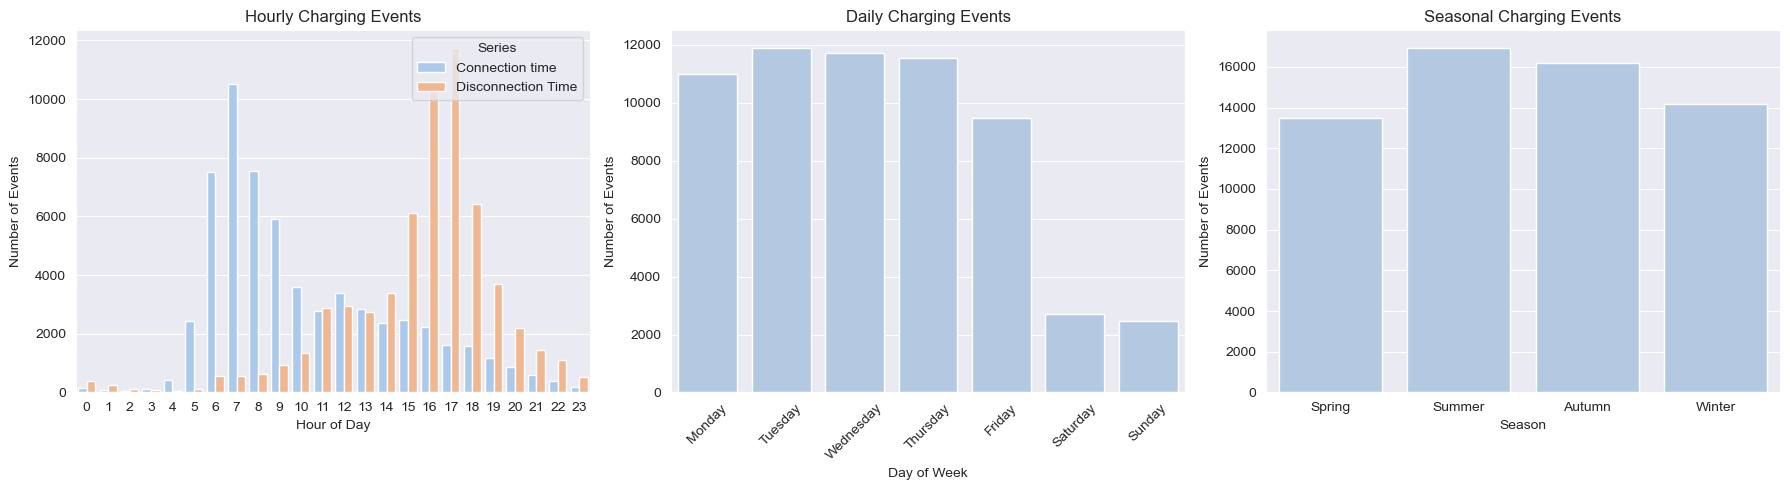

In [14]:
# Extract time-based features
charging_data_cleaned['hourstart'] = charging_data_cleaned['connectionTime'].dt.hour
charging_data_cleaned['hourend'] = charging_data_cleaned['disconnectTime'].dt.hour

charging_data_cleaned['day_of_week'] = charging_data_cleaned['connectionTime'].dt.day_name()
charging_data_cleaned['month'] = charging_data_cleaned['connectionTime'].dt.month
charging_data_cleaned['season'] = charging_data_cleaned['month'].apply(
    lambda x: 'Winter' if x in [12, 1, 2] else 
              'Spring' if x in [3, 4, 5] else 
              'Summer' if x in [6, 7, 8] else 
              'Autumn'
)

# Aggregation for patterns
hourly_pattern_start = charging_data_cleaned.groupby('hourstart').size()
hourly_pattern_end = charging_data_cleaned.groupby('hourend').size()

daily_pattern = charging_data_cleaned.groupby('day_of_week').size()
seasonal_pattern = charging_data_cleaned.groupby('season').size()

# Sort days for correct visualization order
day_order = ['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday']
month_order = ['Spring', 'Summer', 'Autumn', 'Winter']

daily_pattern = daily_pattern.reindex(day_order)
seasonal_pattern = seasonal_pattern.reindex(month_order)

df = pd.DataFrame({
    'Hour': hourly_pattern_start.index,
    'Connection time': hourly_pattern_start.values,
    'Disconnection Time': hourly_pattern_end.values
}).melt(id_vars='Hour', var_name='Series', value_name='Events')

# Plot
plt.figure(figsize=(18, 5))

# First Plot: Hourly Charging Events
plt.subplot(1, 3, 1)  # Subplot 1
sns.barplot(data=df, x='Hour', y='Events', hue='Series', palette='pastel')
plt.title('Hourly Charging Events')
plt.xlabel('Hour of Day')
plt.ylabel('Number of Events')
plt.legend(title='Series', loc='upper right')

# Second Plot: Daily Charging Events
plt.subplot(1, 3, 2)  # Subplot 2
sns.barplot(x=daily_pattern.index, y=daily_pattern.values, color='#abc9ea')
plt.title('Daily Charging Events')
plt.xlabel('Day of Week')
plt.ylabel('Number of Events')
plt.xticks(rotation=45)

# Third Plot: Seasonal Charging Events
plt.subplot(1, 3, 3)  # Subplot 3
sns.barplot(x=seasonal_pattern.index, y=seasonal_pattern.values, color='#abc9ea')
plt.title('Seasonal Charging Events')
plt.xlabel('Season')
plt.ylabel('Number of Events')

plt.tight_layout()
plt.show()

## ToDo: relative Values


## 2 Key Performance Indicators

Goal is to define 3 KPIs for a dashboard and visualize them over time

1. Define KPIs, e.g.:

    - Utilization Rate: Percentage of total available charging station in use.
    -> Highlights how effectively the charging stations are being utilized.

    - Idle Time Percentage: Proportion of stations that are occupied but not actively charging.
    -> Identifies inefficiencies and opportunities to improve turnover.

    - kWh delivered: Total sum of kWh delivered in the respective hour.
    -> Highlights the energy use between hours, helping in capacity planning and pricing strategies.

    Other (not chosen) Alternatives:
    - Peak Hour Utilization: Number of charging sessions started during the busiest hour.
    -> Shows when demand is highest, helping in capacity planning and pricing strategies.

    - Average Charging Speed (kWh/hour): Average rate of energy delivery during charging sessions.
    -> Helps monitor equipment performance and customer experience.

    - Session Duration: Average time per charging session.
    -> Provides insights into user behavior and informs station scheduling.

    - Revenue per kWh (if pricing data available): Average revenue generated per unit of energy delivered. -> No pricing data avalible
    -> Directly ties operational efficiency to financial performance.

    - Sessions per Charger: Average number of charging sessions per station over time. -> not good
    -> Measures the distribution of usage across stations and identifies underperforming assets.

    - Peak-to-Average Load Ratio: Ratio of peak energy demand to average demand.
    -> Helps identify stress periods on the grid and the need for scaling infrastructure.

    - Repeat Customer Ratio: Percentage of unique users returning for multiple sessions.
    -> Indicates customer loyalty and satisfaction with the charging hub.

    - Weather Impact Correlation: Relationship between weather (e.g., temperature, rain) and charging demand.
    -> Provides context for fluctuations in usage, enabling better forecasting

2. Combinne KPIs into an Dataframe
3. Plot the KPIs over time


In [15]:
def aggregate_charging_data(df, start_date, end_date):
    # Erstellen einer Liste aller Stunden im Datumsbereich
    all_hours = pd.date_range(start=start_date, end=end_date, freq='h')
    # Erstellen eines leeren DataFrames für die aggregierten Daten
    aggregated_df = pd.DataFrame(index=all_hours)
    aggregated_df.index.name = 'start_hour'

    total_hourly_chargingDuration = [0] * len(all_hours)
    total_hourly_connectionDuration = [0] * len(all_hours)
    total_numberOfSpaces = 0
    # Iterieren über die Standorte
    for site_id in df['siteID'].unique():
        site_df = df[df['siteID'] == site_id].copy()
        numberOfSpaces = len(site_df['spaceID'].unique())
        total_numberOfSpaces += numberOfSpaces

        hourly_activeSessions = []
        hourly_utilizationRate = []
        hourly_kwhDelivered = []
        hourly_idleRate = []
        hourly_blockedRate = []
        for index, hour in enumerate(all_hours):
            start_of_hour = hour
            end_of_hour = hour + pd.Timedelta(hours=1)
            # Alle chargingSessions, die in der Stunde aktiv waren
            #   folgende Edge-Cases werden aber mitgezählt!:
            #       Wenn eine session genau zum Anfang der Stunde beendet wurde oder
            #       Wenn eine session genau zum Ende der Stunde anfängt
            active_chargers = site_df[(site_df['connectionTime'] <= end_of_hour) & (site_df['disconnectTime'] >= start_of_hour)]
            hourly_activeSessions.append(len(active_chargers))

            total_kwh_in_hour = 0
            total_chargingDuration_in_hour = 0
            total_connectionDuration_in_hour = 0
            for _, charger in active_chargers.iterrows():
                # Wir wollen diverse Kennzahlen wie z.B. die kwhDelivered anteilig berechnen:
                #   daher nehmen wir entweder die connectionTime/ doneChargignTime oder start_hour - je nachdem was größer ist
                #   bei der disconnectTime/ doneChargingTime genauso nur umgekehrt
                connectionTime = max(charger['connectionTime'], start_of_hour)
                disconnectTime = min(charger['disconnectTime'], end_of_hour)
                doneChargingTime = min(charger['doneChargingTime'], end_of_hour)
                # Wie lange wurde in der einen Stunde tatsächlich geladen bzw. wie lange war man tatsächlich verbunden?
                chargingDuration_in_hour = (doneChargingTime - connectionTime).total_seconds() / 3600 #Dauer in Stunden
                connectionDuration_in_hour = (disconnectTime - connectionTime).total_seconds() / 3600 #Dauer in Stunden
                total_connectionDuration_in_hour += connectionDuration_in_hour

                # Edge Cases:   chargingSessions haben genau zum Ende der Stunde angefangen
                #               bzw. zum Anfang der Stunde aufgehört
                #               ODER: chargingSessions befinden sich in idleTime
                if chargingDuration_in_hour > 0:
                    kwh_in_hour = (charger['kWhDelivered'] /
                                   ((charger['doneChargingTime'] - charger['connectionTime']).total_seconds() / 3600)) * chargingDuration_in_hour
                    total_kwh_in_hour += kwh_in_hour
                    total_chargingDuration_in_hour += chargingDuration_in_hour

            # Berechnung der Kennzahlen
            hourly_kwhDelivered.append(total_kwh_in_hour)
            # hourly_utilizationRate.append(total_chargingDuration_in_hour / numberOfSpaces)
            hourly_utilizationRate.append(total_connectionDuration_in_hour / numberOfSpaces)
            total_hourly_chargingDuration[index] += total_chargingDuration_in_hour
            total_hourly_connectionDuration[index] += total_connectionDuration_in_hour
            if total_connectionDuration_in_hour > 0:
                hourly_idleRate.append(total_chargingDuration_in_hour / total_connectionDuration_in_hour)
                hourly_blockedRate.append((total_connectionDuration_in_hour - total_chargingDuration_in_hour) / numberOfSpaces)
            else:
                hourly_idleRate.append(0)
                hourly_blockedRate.append(0)


        aggregated_df[f'activeSessions_site{site_id}'] = hourly_activeSessions
        aggregated_df[f'utilizationRate_site{site_id}'] = hourly_utilizationRate
        aggregated_df[f'kWhDelivered_site{site_id}'] = hourly_kwhDelivered
        aggregated_df[f'idleRate_site{site_id}'] = hourly_idleRate
        aggregated_df[f'blockedRate_site{site_id}'] = hourly_blockedRate

    aggregated_df.fillna(0, inplace=True)
    aggregated_df['activeSessions_total'] = aggregated_df['activeSessions_site1'] + aggregated_df['activeSessions_site2']
    aggregated_df['kWhDelivered_total'] = aggregated_df['kWhDelivered_site1'] + aggregated_df['kWhDelivered_site2']
    # aggregated_df['utilizationRate_total'] = np.array(total_hourly_chargingDuration) / total_numberOfSpaces
    aggregated_df['utilizationRate_total'] = np.array(total_hourly_connectionDuration) / total_numberOfSpaces
    aggregated_df['idleRate_total'] = np.divide(
        total_hourly_chargingDuration,
        total_hourly_connectionDuration,
        out=np.zeros_like(total_hourly_chargingDuration, dtype=float), # wichtig für korrekten Datentyp
        where=np.array(total_hourly_connectionDuration) != 0
    )
    # aggregated_df['blockedRate_total'] = (np.array(total_hourly_connectionDuration) - np.array(total_hourly_chargingDuration)) / total_numberOfSpaces
    aggregated_df['blockedRate_total'] = np.array(total_hourly_chargingDuration) / total_numberOfSpaces
    return aggregated_df


# die Wetterdaten werden immer um 7:53h, 8:53h etc. geliefert -> wir runden also auf die nächste Stunde auf
def round_timestamp(timestamp):
    try:
        # Versuchen, den Zeitstempel zu runden
        return timestamp.round('h')
    except:
#       ... das klappt allerdings nicht immer aufgrund der Sommer-Zeitumstellungen
#           -> in dem Fall lassen wir den timestamp einfach so wie er ist
        return timestamp


def merge_with_weather_data(agg_data, weather):
    weather_data = weather.copy()
    aggregated_data = agg_data.copy()
    weather_data['timestamp'] = weather_data['timestamp'].apply(round_timestamp)
    # auf stündliche Daten reduzieren (falls irgendwo mehrere Aufzeichnungen pro Stunde geliefert werden)
    weather_data = weather_data.set_index('timestamp').resample('h').first().reset_index()
    weather_data = weather_data.rename(columns={'timestamp': 'start_hour'})

    aggregated_data = pd.merge(aggregated_data, weather_data, on='start_hour', how='left')
    aggregated_data.drop(columns=['city', 'felt_temperature', 'weather_date'], inplace=True)
    return aggregated_data

Idea:
Use the settings to adjust the Start & End time (the considered time frame):
- For the exapmle it is set randomly in the data set
- for a Dashboard this coulnd be programmd to show the last x days with data

,activeSessions_site1,utilizationRate_site1,kWhDelivered_site1,idleRate_site1,blockedRate_site1,activeSessions_site2,utilizationRate_site2,kWhDelivered_site2,idleRate_site2,blockedRate_site2,activeSessions_total,kWhDelivered_total,utilizationRate_total,idleRate_total,blockedRate_total
start_hour,,,,,,,,,,,,,,,
2019-01-03 00:00:00-08:00,1,0.007313,0.0,0.0,0.007313,2,0.037037,0.0,0.0,0.037037,3,0.0,0.022455,0.0,0.0
2019-01-03 01:00:00-08:00,0,0.000000,0.0,0.0,0.000000,2,0.037037,0.0,0.0,0.037037,2,0.0,0.018868,0.0,0.0
2019-01-03 02:00:00-08:00,0,0.000000,0.0,0.0,0.000000,2,0.035036,0.0,0.0,0.035036,2,0.0,0.017849,0.0,0.0
2019-01-03 03:00:00-08:00,0,0.000000,0.0,0.0,0.000000,1,0.018519,0.0,0.0,0.018519,1,0.0,0.009434,0.0,0.0
2019-01-03 04:00:00-08:00,0,0.000000,0.0,0.0,0.000000,1,0.018519,0.0,0.0,0.018519,1,0.0,0.009434,0.0,0.0


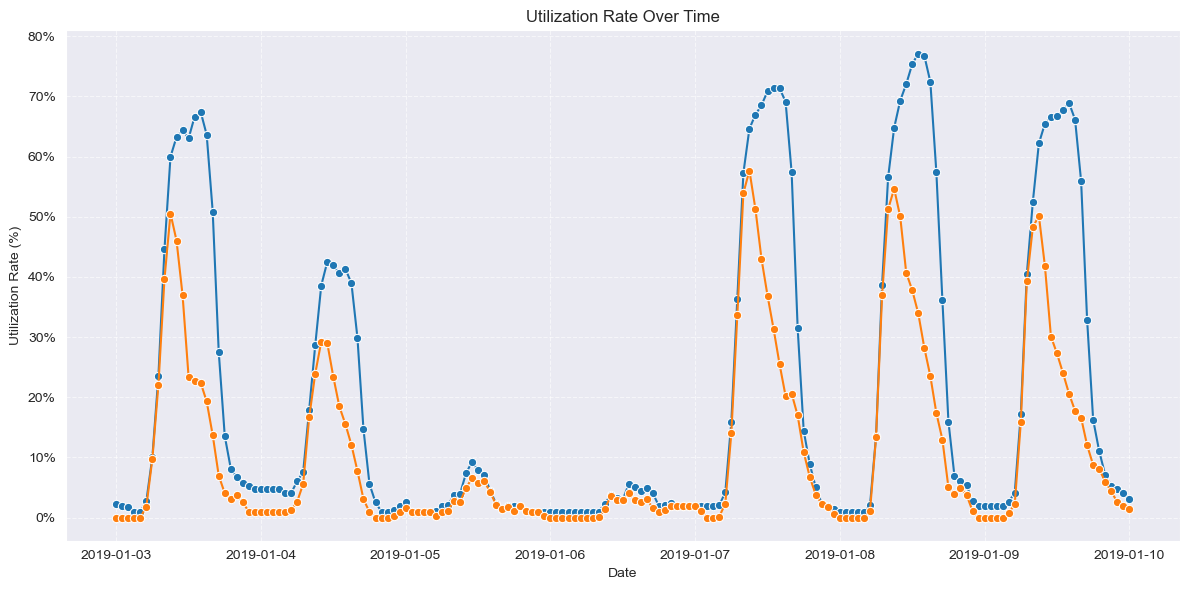

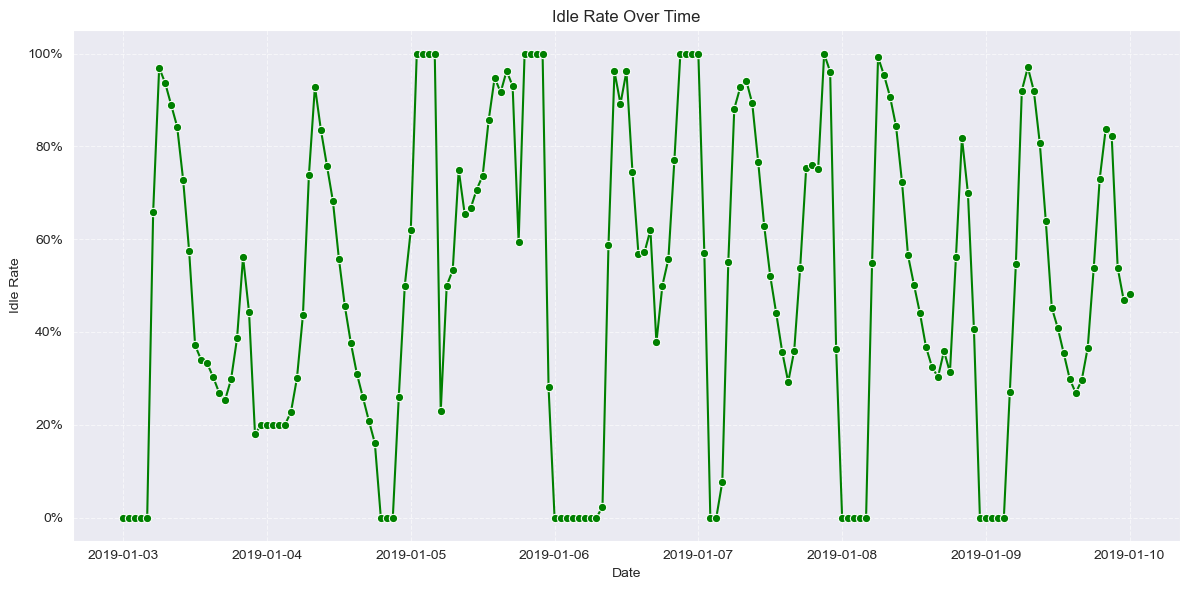

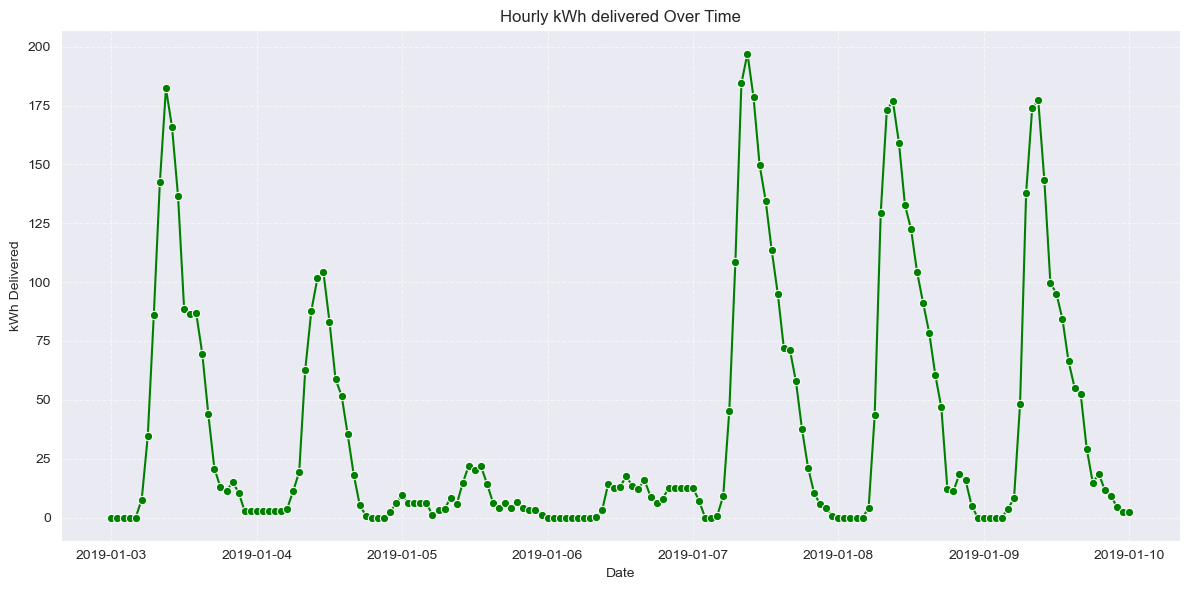

In [16]:
# Settings:
start_time = "2019-01-03"
end_time = "2019-01-10"

result = aggregate_charging_data(charging_data_cleaned, pd.to_datetime(start_time).tz_localize('America/Los_Angeles'),
                                 pd.to_datetime(end_time).tz_localize('America/Los_Angeles'))


display(result.head())

# Display the result
plt.figure(figsize=(12, 6))
sns.lineplot(data=result, x='start_hour', y='utilizationRate_total', marker='o', color='tab:blue')
sns.lineplot(data=result, x='start_hour', y='blockedRate_total', marker='o', color='tab:orange')
plt.title('Utilization Rate Over Time')
plt.xlabel('Date')
plt.ylabel('Utilization Rate (%)')
plt.grid(visible=True, linestyle='--', alpha=0.6)
plt.gca().yaxis.set_major_formatter(PercentFormatter(1))
plt.tight_layout()
plt.show()

plt.figure(figsize=(12, 6))
sns.lineplot(data=result, x='start_hour', y='idleRate_total', marker='o', color='green')
plt.title('Idle Rate Over Time')
plt.xlabel('Date')
plt.ylabel('Idle Rate')
plt.grid(visible=True, linestyle='--', alpha=0.6)
plt.gca().yaxis.set_major_formatter(PercentFormatter(1))
plt.tight_layout()
plt.show()

plt.figure(figsize=(12, 6))
sns.lineplot(data=result, x='start_hour', y='kWhDelivered_total', marker='o', color='green')
plt.title('Hourly kWh delivered Over Time')
plt.xlabel('Date')
plt.ylabel('kWh Delivered')
plt.grid(visible=True, linestyle='--', alpha=0.6)
plt.tight_layout()
plt.show()

## 3 Site Characteristics

#### Public vs. private charging hubs
In order to find out which of the two sites is the public one, we first have to clarefy caracteristics of private and public charging hubs and what we think how they differ:
1. Public Charging Hubs:
    - __User patterns__: Public Hubs likely serve a more broad and transistant user base with a higher number of unique users. The sessions per user might be lower, because users use the charging stations occasionally (e.g. at trips).
    - __Energy consumtion__: The total Energy delivered ist most likely higher due to the larger number of users, while the energy delivered per session is likely smaller becuse User only charge whats necessary.
    - __Infrastructure__: The number of stations is higher to accomodate more users. That for the sessions per station could be lower due to more destribution.
    - __Session timing__: The usage might align with travel times (e.g. middays or weekends). Because Users typicly only "top up" their cars instead of charging it full the average charging time is most likely shorter.
2. Private Charging Hubs:
    - __User patterns__: Pivate Hubs likely serve a specific user group, such as employees. There are likely less individual users but higher sessions per user due to frequent use by the same people
    - __Energy consumtion__: The total Energy delivered ist most likely lower, while the energy delivered per session is likely higher due to fewer but longer sessions.
    - __Infrastructure__: Fewer stations but higher sessions per station, as usage is split among a smaller group.
    - __Session timing__: The usage might align with regular schedules (e.g. working). The average charging durations are kikely longer, as users might leave their vehicles for extended periods, like during work.

#### Data analysis strategy
To find out which of the sites is public we will look at specific Metrics per site, explore seasonal patterns and look at differences in operation.

##### 1. Metrics

In [17]:
site_data = charging_data_cleaned.groupby('siteID').agg({
    'kWhDelivered': ['mean', 'sum', 'count'],
    'userID': 'nunique',
    'stationID': 'nunique',
    'charging_duration': 'mean'
})

# Rename columns
site_data.columns = ['Avg_kWh_Delivered', 'Total_kWh_Delivered', 'Total_Sessions', 'Unique_Users', 'Unique_Stations', 'Avg_Charging_Duration']

# Calculate Metrics
valid_sessions = charging_data_cleaned[charging_data_cleaned['userID'].notnull()]
valid_session_counts = valid_sessions.groupby('siteID').size()

site_data['Sessions_per_User'] = valid_session_counts / site_data['Unique_Users']
site_data['Sessions_per_Station'] = site_data['Total_Sessions'] / site_data['Unique_Stations']

display(site_data)

,Avg_kWh_Delivered,Total_kWh_Delivered,Total_Sessions,Unique_Users,Unique_Stations,Avg_Charging_Duration,Sessions_per_User,Sessions_per_Station
siteID,,,,,,,,
1,14.157980,447080.676752,31578,512,52,241.348469,61.675781,607.269231
2,8.807111,257643.223753,29254,460,54,175.585897,63.595652,541.740741


##### Observations:
We can observe the following from the site Data:
- Unique Users: Higher unique users suggest site 2 being a public hub.
- Sessions per User: Lower sessions per user suggest a public hub, while higher values point to a private hub, pointing to the same conclusion as the unique users.
- Charging Duration: Shorter durations suggest site 2 being a public hub, as users don’t stay long.
- Energy Delivered: Higher average energy per session suggests site 1 being a private hub.
The metrics suggest that site 1 is the private one and site to being the orivate one. To make sure, we look at Time-Based patterns.

##### 2. Time-Based Patterns

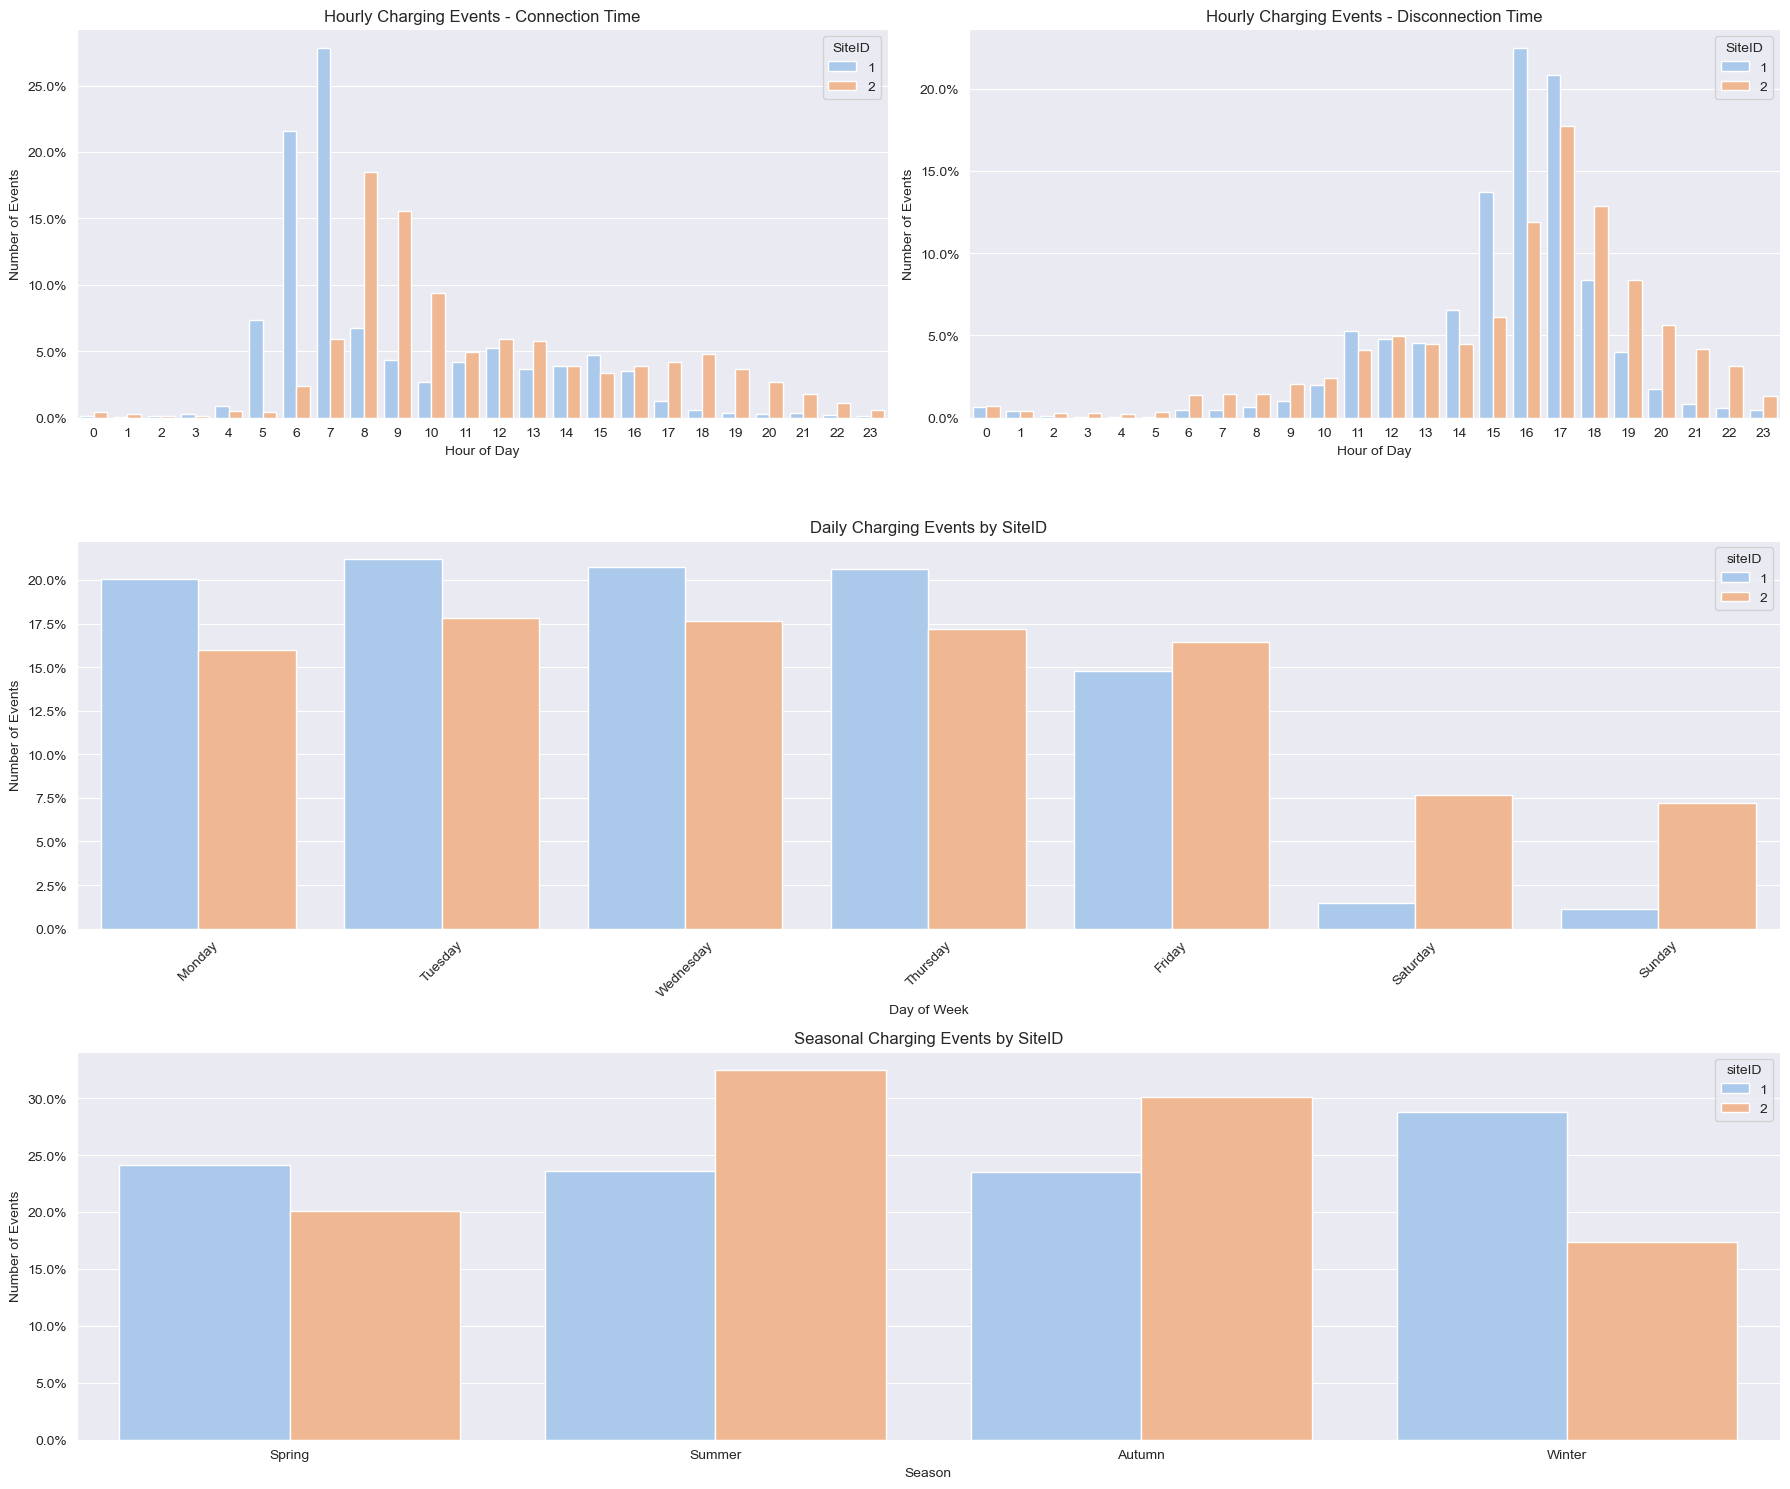

In [18]:
# Berechne die Gesamtanzahl der Events pro Standort (siteID)
total_events_site = charging_data_cleaned.groupby('siteID').size().reset_index(name='TotalEvents')

# Berechne die relativen Werte für hourly_pattern_site
hourly_pattern_site = charging_data_cleaned.groupby(['hourstart', 'siteID']).size().reset_index(name='Events')
hourly_pattern_site = hourly_pattern_site.merge(total_events_site, on='siteID')
hourly_pattern_site['RelativeEvents'] = hourly_pattern_site['Events'] / hourly_pattern_site['TotalEvents']

# Berechne die relativen Werte für hourly_pattern_end_site
hourly_pattern_end_site = charging_data_cleaned.groupby(['hourend', 'siteID']).size().reset_index(name='Events')
hourly_pattern_end_site = hourly_pattern_end_site.merge(total_events_site, on='siteID')
hourly_pattern_end_site['RelativeEvents'] = hourly_pattern_end_site['Events'] / hourly_pattern_end_site['TotalEvents']

# Berechne die relativen Werte für daily_pattern_site
daily_pattern_site = charging_data_cleaned.groupby(['day_of_week', 'siteID']).size().reset_index(name='Events')
daily_pattern_site = daily_pattern_site.merge(total_events_site, on='siteID')
daily_pattern_site['RelativeEvents'] = daily_pattern_site['Events'] / daily_pattern_site['TotalEvents']

# Berechne die relativen Werte für seasonal_pattern_site
seasonal_pattern_site = charging_data_cleaned.groupby(['season', 'siteID']).size().reset_index(name='Events')
seasonal_pattern_site = seasonal_pattern_site.merge(total_events_site, on='siteID')
seasonal_pattern_site['RelativeEvents'] = seasonal_pattern_site['Events'] / seasonal_pattern_site['TotalEvents']

# Plot
plt.figure(figsize=(18, 15))

# First Plot: Hourly connetion and disconnection events for each siteID
plt.subplot(3, 2, 1)
sns.barplot(data=hourly_pattern_site, x='hourstart', y='RelativeEvents', hue='siteID', palette='pastel')
plt.title('Hourly Charging Events - Connection Time')
plt.xlabel('Hour of Day')
plt.ylabel('Number of Events')
plt.legend(title='SiteID', loc='upper right')
plt.gca().yaxis.set_major_formatter(PercentFormatter(1))

plt.subplot(3, 2, 2)
sns.barplot(data=hourly_pattern_end_site, x='hourend', y='RelativeEvents', hue='siteID', palette='pastel')
plt.title('Hourly Charging Events - Disconnection Time')
plt.xlabel('Hour of Day')
plt.ylabel('Number of Events')
plt.legend(title='SiteID', loc='upper right')
plt.gca().yaxis.set_major_formatter(PercentFormatter(1))

# Secound Plot: Daily Charging Events for each siteID
plt.subplot(3, 1, 2)
sns.barplot(data=daily_pattern_site, x='day_of_week', y='RelativeEvents', hue='siteID', palette='pastel', order=day_order)
plt.title('Daily Charging Events by SiteID')
plt.xlabel('Day of Week')
plt.ylabel('Number of Events')
plt.xticks(rotation=45)
plt.gca().yaxis.set_major_formatter(PercentFormatter(1))

# Third Plot: Seasonal Charging Events for each siteID
plt.subplot(3, 1, 3)
sns.barplot(data=seasonal_pattern_site, x='season', y='RelativeEvents', hue='siteID', palette='pastel', order=month_order)
plt.title('Seasonal Charging Events by SiteID')
plt.xlabel('Season')
plt.ylabel('Number of Events')
plt.gca().yaxis.set_major_formatter(PercentFormatter(1))

# Layout anpassen
plt.tight_layout()
plt.show()

# Check data hole

##### Observations:
The analysis of time pattern support the privious obserations that site one is the private and site two the public one.
1. Site 1: The hourly and daily Charging events show a work related pattern. Connection an disconnection times show are in highest between 7am and 4pm and the site is much more used on weekdays. The seasonal distribution shows no sicnificant pattern.
2. Site 2: The patterns seem to be more travel related. Connection/disconnection time is later on average and there are more connections on weekends. The site is mostly used in Summer

#### Conclusion
After we looked at the caracteristics and operations of public and povate charging hubs, developing an data analytics strategy based on the findings and executing it, we found, that site 1 ist likely the private and site 2 the public charging hub.

## 4 Export of aggregated Data

In [19]:
to_be_exported = aggregate_charging_data(charging_data_cleaned,
                                         charging_data_cleaned['connectionTime'].min().floor('h'),
                                         charging_data_cleaned['disconnectTime'].max().ceil('h'))
to_be_exported = merge_with_weather_data(to_be_exported, weather_data_cleaned)
# Hinzufügen der Zeitspalten
to_be_exported = to_be_exported.set_index('start_hour')
to_be_exported['hour_of_day'] = to_be_exported.index.hour
to_be_exported['week_of_year'] = to_be_exported.index.isocalendar().week
to_be_exported['day_of_week'] = to_be_exported.index.dayofweek  # 0=Montag, 6=Sonntag
to_be_exported['month_of_year'] = to_be_exported.index.month
to_be_exported['is_weekend'] = to_be_exported.index.dayofweek >= 5# Samstag (5) oder Sonntag (6)
to_be_exported['date'] = to_be_exported.index.date

to_be_exported.to_pickle(os.path.join('Data', 'aggregated_data.pkl'))
